# Session 2.2 - Pre Class

## Exercise 11.3

In [30]:
import matplotlib
# matplotlib.use('TkAgg')
import pylab
import numpy as np

n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals

def initialize():
    global config, nextconfig
    config = pylab.zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if pylab.random() < p else 0
    nextconfig = pylab.zeros([n, n])
    
def observe():
    global config, nextconfig
    pylab.cla()
    pylab.imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            if config[x, y] == 0:
                nextconfig[x, y] = 1 if count == 3 else 0
            else: 
                nextconfig[x, y] = 1 if (count == 3 or count == 2) else 0
    config, nextconfig = nextconfig, config
    density = 0
    for dim in nextconfig:
        density += sum(dim)
    return density

# import pycxsimulator
# pycxsimulator.GUI().start(func=[initialize, observe, update])

T = 50
density_list = []
initialize()
for i in range(T):
    density_list.append(update())

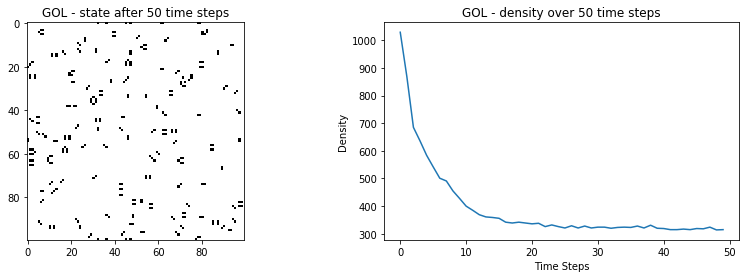

In [33]:
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1) 
observe()
plt.title("GOL - state after {t} time steps".format(t=T))

plt.subplot(1,2,2) 

plt.plot(range(T), density_list)
plt.title("GOL - density over {t} time steps".format(t=T))
plt.xlabel("Time Steps")
plt.ylabel("Density")
plt.show()

## Exercise 11.5

In [41]:
n = 100 # size of space: n x n
# p = 0.1 # probability of initially panicky individuals

def initialize(p = 0.1):
    global config, nextconfig
    config = pylab.zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if pylab.random() < p else 0
    nextconfig = pylab.zeros([n, n])
    
def observe():
    global config, nextconfig
    pylab.cla()
    pylab.imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    density = 0
    for dim in nextconfig:
        density += sum(dim)
    return density

# import pycxsimulator
# pycxsimulator.GUI().start(func=[initialize, observe, update])



In [42]:
T = 100
initial_density = np.arange(0, 1, 0.05)
final_density = []

for initP in initial_density:
    initialize(p=initP)
    for i in range(T-1):
        update()
    final_density.append(update())

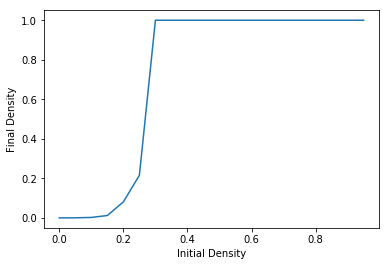

In [45]:
final_density = np.asarray(final_density)
final_density /= n*n
plt.plot(initial_density, final_density)
plt.title("")
plt.xlabel("Initial Density")
plt.ylabel("Final Density")
plt.show()

We can see in the plot that the high increase in final density occurs at an initial density of about 0.25